<a href="https://colab.research.google.com/github/gingyy/adopt-a-stream-georgia/blob/main/data_dictionary_version_4_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving export_dataframe_stage2.csv to export_dataframe_stage2.csv


In [2]:
import io
import datetime
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(io.BytesIO(uploaded['export_dataframe_stage2.csv'])) #replace with file name

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (14,20,21,23,24,31,32,33,35,36,56,63,64,65,72,73,74,77,78,79,86,87,88) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Group 1 Data Dictionary (version 4/5/22)

In [3]:
rows = len(df)
df.head()

,group_rid,GroupName,site_rid,state,county,lat,long,SiteName,SiteLocation,event_rid,...,min_temp,max_temp,three_M_plate,ecoli_idexx,fecal_coliform,ecoli_other,ecoli_other_unit,comments,warnings,wbd
0,840,Rails to Trails,18,Georgia,Hall,34.4103,-83.8462,West Fork of Little River,34.4103 -83.8462,92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West Fork Little River
1,840,Rails to Trails,18,Georgia,Hall,34.4103,-83.8462,West Fork of Little River,34.4103 -83.8462,93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West Fork Little River
2,297,"Apalachee Water Watchers, Walton Clean & Beaut...",44,Georgia,Walton,33.8406,-83.5584,Apalachee River,33.8406 -83.5584,94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Turkey Creek-Appalachee River
3,297,"Apalachee Water Watchers, Walton Clean & Beaut...",44,Georgia,Walton,33.8406,-83.5584,Apalachee River,33.8406 -83.5584,95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Turkey Creek-Appalachee River
4,297,"Apalachee Water Watchers, Walton Clean & Beaut...",44,Georgia,Walton,33.8406,-83.5584,Apalachee River,33.8406 -83.5584,96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Turkey Creek-Appalachee River


# group_rid

Numerical identifier associated with ```GroupName```
* There are 992 distinct group_rid
* No null values
* All integers


In [4]:
print(df['group_rid'].isnull().sum()) # how many null values
print(df['group_rid'].nunique()) # how many unique values

print(df['group_rid'].dtypes)
non_ints = []
for val in df['group_rid']:
    try:
        int(val)
    except TypeError:
        non_ints.append(val)

print(non_ints)

0
992
int64
[]


# GroupName

Name of citizen group who collected the associated data entry
* 992 distinct group names
* No null values
* All strings

In [5]:
print(df['GroupName'].isnull().sum()) # how many null values
print(df['GroupName'].nunique()) # how many unique values

print(df['GroupName'].dtypes)

0
992
object


# site_rid

Numerical identifier associated with ```SiteLocation```
* 2637 distinct values
* No null values
* All integers
* Will further investigate if it corresponds to any geographical factors

In [6]:
print(df['site_rid'].isnull().sum()) # how many null values
print(df['site_rid'].nunique()) # how many unique values

print(df['site_rid'].dtypes)
non_ints = []
for val in df['site_rid']:
    try:
        int(val)
    except TypeError:
        non_ints.append(val)

print(non_ints)

0
2637
int64
[]


# event_rid

Numerical identifier associated with ```event_date```
* Effectively an index for each entry 
* Does not appear to be chronological
* Unique value for each data entry
* Appears to skips values at random
* 59598 entries
* All integers

In [7]:
print(df['event_rid'].isnull().sum()) # how many null values
print(df['event_rid'].nunique()) # how many unique values
print(df['event_rid'].nunique()/(rows)*100) # percentage unique values

print(df['event_rid'].dtypes)
non_ints = []
for val in df['event_rid']:
    try:
        int(val)
    except TypeError:
        non_ints.append(val)

print(non_ints)

0
59598
100.0
int64
[]


# Comments

Notes describing the condition of the river (trash, etc.)
* 94.7% of data in this column are NaN 
* 2724 distinct values
* All kinds of environmental features noticed, including vegetation, water quality, water level, smell, trash ... or just used as a place of communication between researchers
* All strings

In [8]:
from numpy import str0
num_null = (df['Comments'].isnull().sum()) # how many null values
print(num_null)
print(num_null/rows*100) # percentage null values

print(df['Comments'].nunique()) # how many unique values
print(df['Comments'].nunique()/(rows-num_null)*100) # percentage unique values

print(df['Comments'].dtypes)


56435
94.69277492533307
2724
86.12077141953841
object


In [9]:
# examples of comments
df[df['Comments'].notnull()]['Comments']

21147    Spring emergent vegetation has begun to appear...
21156    A.  Please note that Friends of Caney Creek. o...
21174                              Erosion due to flooding
21175                              Erosion due to flooding
21176                              Erosion due to flooding
                               ...                        
59589    Current flow at USGS gauge in Montezuma = 2320...
59590    Current flow at USGS gauge in Montezuma = 2320...
59591    Current flow at USGS gauge in Montezuma = 2320...
59592    Current flow at USGS gauge in Montezuma = 2320...
59593    Current flow at USGS gauge in Americus GA = 44...
Name: Comments, Length: 3163, dtype: object

# comments

Notes with scientific information (bacteria, etc.)
* 99% are NaN values
* 464 unique comments, 86% of non-null data in this column is unique
* more focused on the detection and abnormal features of bacteria level
* All strings

In [10]:
num_null = (df['comments'].isnull().sum()) # how many null values
print(num_null)
print(num_null/rows*100) # percentage null values

print(df['comments'].nunique()) # how many unique values
print(df['comments'].nunique()/(rows-num_null)*100) # percentage unique values

print(df['comments'].dtypes)


59057
99.09225141783281
464
85.76709796672827
object


# warnings

Standardized labels all refer to "Bacterial Warnings:"
* 99.5% are NaN values
* In total 165 sites reported warnings, and all of them reported the same thing
* Some groups have more warnings than others (see data table below)
* All strings

In [11]:
num_null = (df['warnings'].isnull().sum()) # how many null values
print(num_null)
print(num_null/rows*100) # percentage null values

print(df['warnings'].nunique()) # how many unique values
print(df['warnings'].nunique()/(rows-num_null)*100) # percentage unique values

print(df['warnings'].value_counts()) # there are 321 entries of "Bacterial Warnings"

df_warning=df[df['warnings'].notnull()]
arr = df_warning.iloc[:,2]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  print(len(arr.value_counts())) # number of sites reporting "Bacterial Warnings"

print(df['warnings'].dtypes)


59277
99.46139132185644
1
0.3115264797507788
Bacterial Warnings:    321
Name: warnings, dtype: int64
165
object


In [12]:
df_warnings = df.groupby(['site_rid'])['warnings'].count()
df_warnings = pd.DataFrame(df_warnings)
df_warnings.index.names = ['Site ID']
df_warnings.columns = ['Warning Counts']
df_warnings2 = df_warnings.sort_values(by='Warning Counts', ascending=False)
df_warnings2

,Warning Counts
Site ID,
2986,23
1398,12
316,10
6796,10
2858,9
...,...
2047,0
2055,0
2056,0


# SiteName

Name of the body of water or general location
* 1892 unique site names
* Directly associated with columns ```site_rid```,	```state```,	```county```,	```lat```,	```long```,	```SiteName```,	```SiteLocation```
* Appears to be a more general label for ```wbd```

In [13]:
print(df['SiteName'].isnull().sum()) # how many null values
print(df['SiteName'].nunique()) # how many unique values
print(df['SiteName'].nunique()/(rows)*100) # percentage unique values

print(df['SiteName'].dtypes)


0
1892
3.1746031746031744
object


# SiteLocation

Coordinates of the site location
* Direct combination of columns ```lat``` and ```long```, in that order
* Coordinates are separated by two spaces between the latitute and longitude, with no exceptions in parsing

In [14]:
print(df['SiteLocation'].isnull().sum()) # how many null values
print(df['SiteLocation'].nunique()) # how many unique values
print(df['SiteLocation'].nunique()/(rows)*100) # percentage unique values

print(df['SiteLocation'].dtypes)

0
2599
4.360884593442733
object


In [15]:
df_coords = df['SiteLocation'].str.split("  ", n=1, expand=True) # new data frame with 1 column for latitude and 1 column for longitude
print(df_coords)

df['lat'] = df['lat'].astype(float, errors = 'raise')
df_coords = df_coords.astype(float, errors='raise')

print(df['lat'].equals(df_coords[0])) #check if values are the same as latitutde column
print(df['long'].equals(df_coords[1])) #check if values are the same as longitude column

             0         1
0      34.4103  -83.8462
1      34.4103  -83.8462
2      33.8406  -83.5584
3      33.8406  -83.5584
4      33.8406  -83.5584
...        ...       ...
59593  32.0067  -84.2266
59594  31.2387  -82.3231
59595  31.2933  -81.9571
59596  31.2196  -81.8677
59597    31.24  -81.8634

[59598 rows x 2 columns]
True
True


# event_date

Date of the collection event in format YYYY-MM-DD HH:MM:SS	
* Partially associated with ```event_rid```
* ```event_rid``` contains all unique values while ```event_date``` contains 8356 non-unique values. Duplicates are shown in the table below.
* all in datetime formate YYYY-MM-DD HH:MM:SS

In [16]:
import datetime
print(df['event_date'].isnull().sum()) # how many null values

print(df['event_date'].nunique()) # how many unique values
print(rows - df['event_date'].nunique()) # number of non-unique values
print(df['event_date'].nunique()/(rows)*100) # percentage unique values

print(df['event_date'].dtypes)
non_datetime = []
for val in df['event_date']:
    try:
        datetime.datetime.strptime(val, '%Y-%m-%d %H:%M:%S') 
    except TypeError:
        non_datetime.append(val)

print(non_datetime)

0
51242
8356
85.97939528172085
object
[]


In [17]:
df_eventdate = df['event_date'].value_counts()
df_eventdate[df_eventdate > 1] # table of duplicate dates

2005-07-30 12:00:00    18
2014-04-10 14:00:00    18
2005-11-05 10:00:00    17
2020-07-23 12:00:00    15
2014-04-03 10:30:00    14
                       ..
2021-02-06 11:40:00     2
2015-11-05 10:00:00     2
2017-08-31 10:25:00     2
2017-03-10 10:00:00     2
2017-02-28 13:30:00     2
Name: event_date, Length: 5690, dtype: int64

# volunteer_time

[Units = Minutes] Number of minutes spent at site by volunteers (inferred based on distribution of values)
* Has a mean of 101 minutes, standard deviation of 657 minutes
* Has a minimum of 0 minutes (44 occurances), and has 23056 NaN values
* Has a maximum of 120210 minutes, which equates to 83.5 days
* The middle 50% lies between 45 minutes and 120 minutes
* Datatype is float, but all values are integers (unit: 1 minute)

In [18]:
from pandas.core.dtypes.common import is_string_dtype
from pandas._libs.lib import is_integer

num_null = (df['volunteer_time'].isnull().sum()) # how many null values
print(num_null)

print(df['volunteer_time'].nunique()) # how many unique values
print(df['volunteer_time'].nunique()/(rows-num_null)*100) # percentage unique values


23056
442
1.2095670735044606


In [19]:
print(df['volunteer_time'].describe())

count     36542.000000
mean        100.887910
std         657.271641
min           0.000000
25%          45.000000
50%          60.000000
75%         120.000000
max      120210.000000
Name: volunteer_time, dtype: float64


In [20]:
120210/24/60 # maximum value in days

83.47916666666667

In [21]:
print(df['volunteer_time'].dtypes) 
non_ints = []
df_volunteer_nonull = df[df['volunteer_time'].notnull()]
for val in df_volunteer_nonull['volunteer_time']:
    try:
      int(val)
    except ValueError:
        non_ints.append(val)
print(non_ints)
print("")

print(df['volunteer_time'].value_counts()) 

float64
[]

60.0      10412
180.0      4023
120.0      3065
30.0       2866
90.0       1382
          ...  
1750.0        1
276.0         1
246.0         1
525.0         1
402.0         1
Name: volunteer_time, Length: 442, dtype: int64


In [22]:
print(len(df[df['volunteer_time'] == 0.0])) # number of values that are 0 minutes

44


7     120.0
8     120.0
12     60.0
13     60.0
15     60.0
Name: volunteer_time, dtype: float64


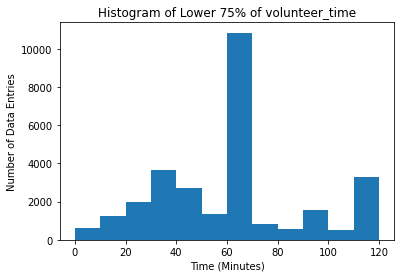

In [23]:
df_volunteertime_lower75 = df.loc[(df['volunteer_time'] <= 120.0)]
print(df_volunteertime_lower75['volunteer_time'].head())

fig,ax=plt.subplots(1,1)
plt.hist(df_volunteertime_lower75['volunteer_time'], bins=12)
ax.set(xlabel='Time (Minutes)', ylabel='Number of Data Entries', title='Histogram of Lower 75% of volunteer_time')
plt.show()

0    180.0
1    180.0
2    180.0
3    180.0
4    180.0
Name: volunteer_time, dtype: float64


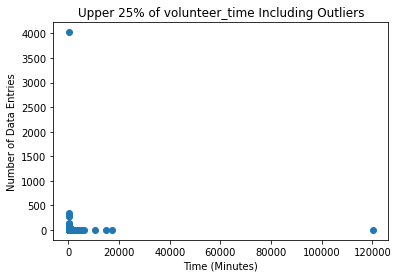

In [24]:
df_volunteertime_upper25 = df.loc[(df['volunteer_time'] > 120.0)]
print(df_volunteertime_upper25['volunteer_time'].head())

df_volunteertime_upper25_vc = df_volunteertime_upper25['volunteer_time'].value_counts()
df_volunteertime_upper25_vc = df_volunteertime_upper25_vc.to_frame()
df_volunteertime_upper25_vc.iloc[:,0]

fig,ax=plt.subplots(1,1)
ax.plot(df_volunteertime_upper25_vc.index, df_volunteertime_upper25_vc.iloc[:,0], 'o')
ax.set(xlabel='Time (Minutes)', ylabel='Number of Data Entries', title='Upper 25% of volunteer_time Including Outliers')
plt.show()

0    180.0
1    180.0
2    180.0
3    180.0
4    180.0
Name: volunteer_time, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


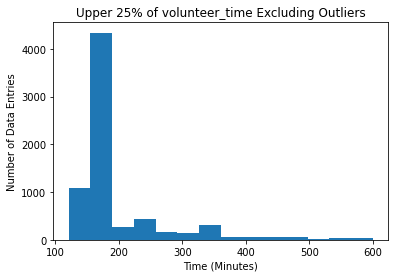

In [25]:
df_volunteertime_upper = df.loc[(df['volunteer_time'] > 120.0)]
df_volunteertime_upper = df_volunteertime_upper[(df['volunteer_time'] <= 600.0)]
print(df_volunteertime_upper['volunteer_time'].head())

fig,ax=plt.subplots(1,1)
plt.hist(df_volunteertime_upper['volunteer_time'], bins='auto')
ax.set(xlabel='Time (Minutes)', ylabel='Number of Data Entries', title='Upper 25% of volunteer_time Excluding Outliers')
plt.show()

In [26]:
# table of outliers
((df.loc[(df['volunteer_time'] > 600.0)]).sort_values(by=['volunteer_time']))['volunteer_time']

42827       601.0
54896       604.0
55179       606.0
55605       610.0
50993       615.0
           ...   
43633      6010.0
59343     10620.0
55047     15000.0
45135     17340.0
38978    120210.0
Name: volunteer_time, Length: 342, dtype: float64

# createdby

Contact information for party associated with the data entry
* 78% of entries are "EPDMIG"
* 20% of entries are emails (contain an ```@``` symbol) with a combination of personal, academic institutional, and organizational addresses
* 0.5% (140 count) entries are neither "EPDMIG" nor contain an ```@``` symbol but are non-null
* 1.5% of entries are null


* "EPDMIG" rows have the same several ```createddate``` values, implying mass imports of data


In [27]:
num_null = (df['createdby'].isnull().sum()) # how many null values
print(num_null)
print(num_null/rows*100) # percentage null values

print(df['createdby'].nunique()) # how many unique values
print(df['createdby'].nunique()/(rows-num_null)*100) # percentage unique values

871
1.461458438202624
583
0.9927290684012465


In [28]:
print((df['createdby']=='EPDMIG').sum()/rows*100)

78.03114198463035


In [29]:
df_createdby_emails = (df.loc[(df['createdby'] != 'EPDMIG') & (df['createdby'].notnull() == True)])['createdby']
df_createdby_emails.head()

print(len(df_createdby_emails)) # number of non-'EPDMIG' entries
print(sum(df_createdby_emails.str.contains('@', regex=False))) # number of emails
print(sum(df_createdby_emails.str.contains('@', regex=False))/rows*100) # percentage of emails

df_createdby_emails_true = df_createdby_emails.str.contains('@', regex=False)
non_emails = df_createdby_emails[df_createdby_emails_true == False]
print(non_emails)
len(non_emails)


12222
12082
20.27249236551562
34070         TKaty675
34183          YBen369
34185          YBen369
34281         TKaty675
34470         TKaty675
             ...      
55171    LaToshaWalker
55172    LaToshaWalker
55286    LaToshaWalker
55287    LaToshaWalker
55288    LaToshaWalker
Name: createdby, Length: 140, dtype: object


140

In [30]:
df_EPDMIG = df.loc[(df['createdby'] == 'EPDMIG')]
df_EPDMIG

df_EPDMIG_table = df_EPDMIG['createddate'].value_counts()

df_EPDMIG_table = pd.DataFrame(df_EPDMIG_table)
df_EPDMIG_table.index.names = ['createddate']
df_EPDMIG_table.columns = ['Entry Counts']
df_EPDMIG_table

,Entry Counts
createddate,
3/10/17 11:48 PM,33892
11/2/21 10:28 AM,2202
9/29/17 10:22 AM,1668
12/21/20 4:59 PM,1500
12/11/17 2:22 PM,1175
10/25/19 10:11 AM,962
7/18/19 10:28 AM,913
1/23/19 3:12 PM,904
12/18/18 2:30 PM,547


# createddate

Date the data was uploaded, in format M/D/YY HH:MM AM/PM

In [31]:
num_null = (df['createddate'].isnull().sum()) # how many null values
print(num_null)

print(df['createddate'].nunique()) # how many unique values
print(df['createddate'].nunique()/(rows-num_null)*100) # percentage unique values

871
12164
20.71278968787781


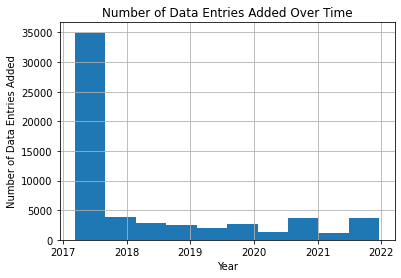

In [32]:
createddate_datetime = pd.to_datetime(df['createddate'])

fig,ax = plt.subplots(1,1)
createddate_datetime.hist()
ax.set(xlabel='Year', ylabel='Number of Data Entries Added', title='Number of Data Entries Added Over Time')
plt.show()

# data_entry

An indicator or label corresponding to ```group_rid``` and ```GroupName``` but with more NA values
* 1573 distinct values
* Float data type but all values are integers (end in .0), used as a categorical label
* Includes inconsistencies with different ```data_entry``` values for the same ```group_rid``` and ```GroupName```
* Often, same ```data_entry``` corresponds to same ```site_rid``` with a few exceptions, in which one ```data_entry``` corresponds to several consecutive ```site_rid```. (EX. ```data_entry``` 3307.0 to ```site_rid``` 45,46,47)


In [33]:
num_null = (df['data_entry'].isnull().sum()) # how many null values
print(num_null)

print(df['data_entry'].nunique()) # how many unique values
print(df['data_entry'].nunique()/(rows-num_null)*100) # percentage unique values

298
1573
2.6526138279932545


In [34]:
df3=df.loc[df.loc[:,"data_entry"].notnull(),["data_entry", "site_rid"]] #compare site_rid with data_entry
df3

,data_entry,site_rid
0,10388.0,18
2,3197.0,44
3,3197.0,44
4,3197.0,44
5,3197.0,44
...,...,...
59593,36976.0,7175
59594,39993.0,3655
59595,39993.0,4339
59596,39993.0,3323


In [35]:
print(df['data_entry'].dtypes) 
non_ints = []
df_dataentry_nonull = df[df['data_entry'].notnull()]
for val in df_dataentry_nonull['data_entry']:
    try:
      int(val)
    except ValueError:
        non_ints.append(val)
print(non_ints)

float64
[]


# participants

[Units = Number of People] Number of people involved in the data collection event
* Minimum value of 0 
* Zero NaN values
* Middle 50% range is 1-2 people
* Maximum of 111 people

In [36]:
print(df['participants'].isnull().sum()) # how many null values

print(df['participants'].nunique()) # how many unique values
print(df['participants'].nunique()/(rows)*100) # percentage unique values

0
63
0.10570824524312897


In [37]:
df['participants'].describe()

count    59598.000000
mean         2.094869
std          3.692220
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        111.000000
Name: participants, dtype: float64

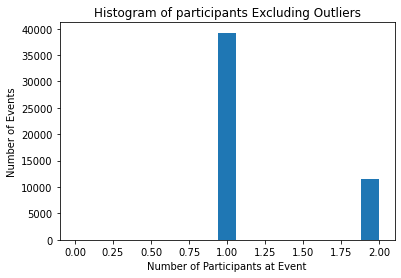

In [38]:
df_participants_lower75 = df.loc[(df['participants'] <= 2.0)]

fig,ax=plt.subplots(1,1)
plt.hist(df_participants_lower75['participants'], bins='auto')
ax.set(xlabel='Number of Participants at Event', ylabel='Number of Events', title='Histogram of participants Excluding Outliers')
plt.show()

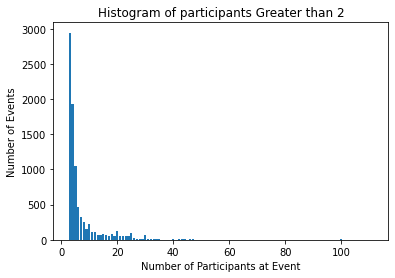

In [39]:
df_participants_outliers = df.loc[(df['participants'] > 2.0)]

df_participants_outliers_vc = df_participants_outliers['participants'].value_counts()
df_participants_outliers_vc = df_participants_outliers_vc.to_frame()
df_participants_outliers_vc.iloc[:,0]

fig,ax=plt.subplots(1,1)
ax.bar(df_participants_outliers_vc.index, df_participants_outliers_vc.iloc[:,0])
ax.set(xlabel='Number of Participants at Event', ylabel='Number of Events', title='Histogram of participants Greater than 2')
plt.show()